In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.cm as cm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings('ignore')

# Part A: Numerical Prediction

``Step 1: Locate, input and clean suitable data. Find a data set that is suitable for a prediction, impute the values and perform any clean up``

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/atreish/AIM_5015_Automated_Machine_Learning/main/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
#Encode Categorical Variables 

#Sex
le = LabelEncoder()
le.fit(data.sex.drop_duplicates()) 
data.sex = le.transform(data.sex)

#Smoker
le.fit(data.smoker.drop_duplicates()) 
data.smoker = le.transform(data.smoker)

#Region
le.fit(data.region.drop_duplicates()) 
data.region = le.transform(data.region)

In [5]:
data1 = data
data1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


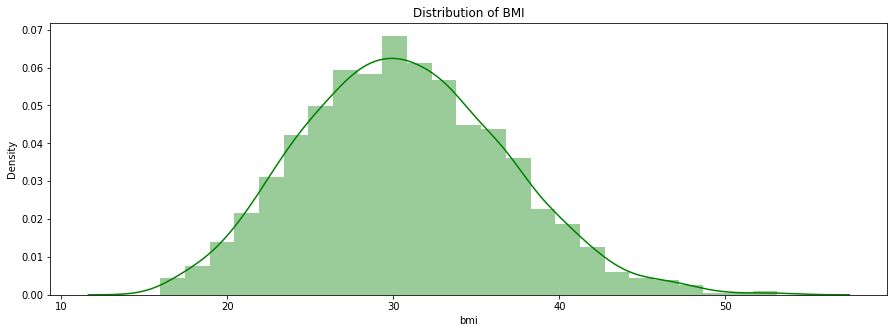

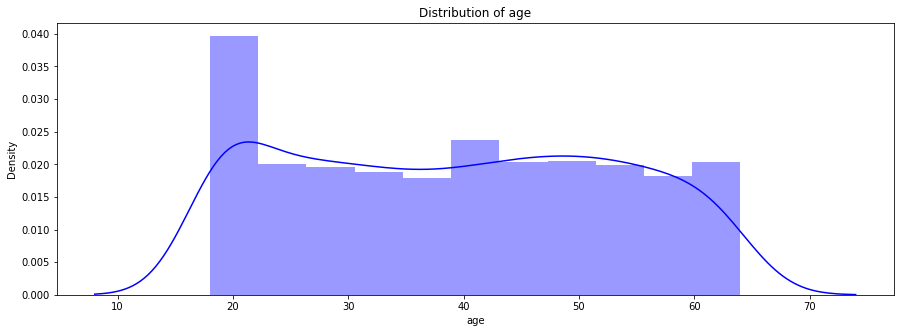

In [6]:
#Distribution Plots of the Numeric Data

plt.figure(figsize=(15,5))
plt.title("Distribution of BMI")
sns.distplot(data["bmi"], color = 'g')

plt.figure(figsize=(15,5))
plt.title("Distribution of age")
sns.distplot(data["age"], color = 'b')

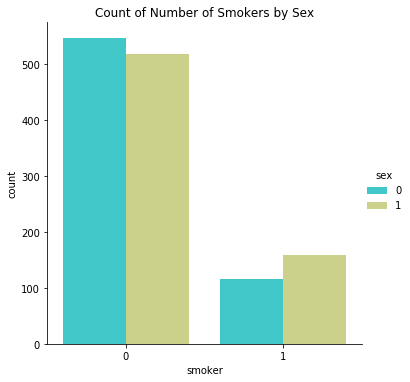

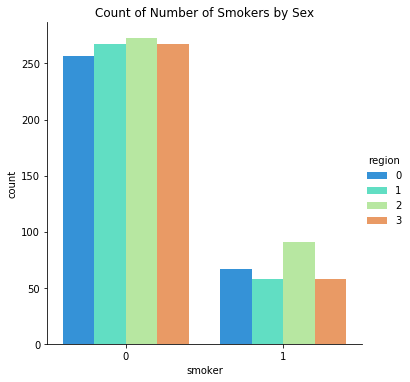

In [7]:
#Countplot of Categorical Data.

sns.catplot(x="smoker", kind="count", hue = 'sex', palette="rainbow", data=data)
plt.title("Count of Number of Smokers by Sex")
plt.show()

sns.catplot(x="smoker", kind="count", hue = 'region', palette="rainbow", data=data)
plt.title("Count of Number of Smokers by Sex")
plt.show()

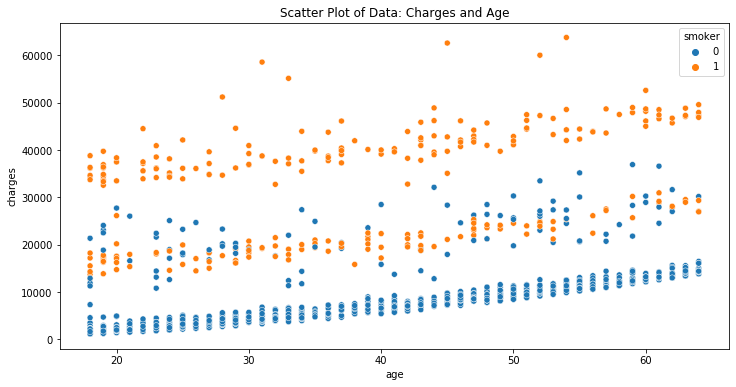

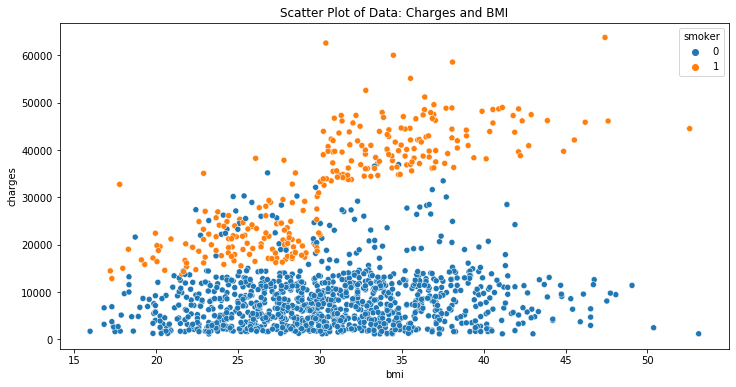

In [8]:
plt.figure(figsize=(12,6))
ax = sns.scatterplot(x='age',y='charges',data=data, hue='smoker')
ax.set_title('Scatter Plot of Data: Charges and Age')
plt.show()

plt.figure(figsize=(12,6))
ax = sns.scatterplot(x='bmi',y='charges',data=data, hue='smoker')
ax.set_title('Scatter Plot of Data: Charges and BMI')
plt.show()

```Step 2: Construct the following type of predictive models using Python
-Linear regression
-Gradient boost like xgboost
-Some form of decision tree
-SVM```

**Decision Boundry**

In [9]:
def draw_decision_boundary(clf, X, y, h = .01, figsize=(12,6), boundary_cmap=cm.winter, points_cmap=cm.cool):
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print("Score: %0.3f" % score)
    pred = clf.predict(X_test)
    figure = plt.figure(figsize=figsize)
    ax = plt.subplot(1, 1, 1)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=boundary_cmap)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=points_cmap, edgecolors='k')
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=points_cmap, alpha=0.6, edgecolors='k')
    figure.show()

# **Linear Regression**

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [11]:
X = data.iloc[:, :-1].values #dependent variables in our data to regression upon
y = data.iloc[:, -1].values #charges will be our independent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test) 

print('The Regression Line Intercent: ', lr.intercept_)
print('\nThe Regression Line Coefficients:\n',lr.coef_)

The Regression Line Intercent:  -11661.983908824399

The Regression Line Coefficients:
 [  253.99185244   -24.32455098   328.40261701   443.72929547
 23568.87948381  -288.50857254]


In [13]:
mse_lr = mean_squared_error(y_test, y_pred)
mae_lr = metrics.mean_absolute_error(y_test, y_pred)
rmse_lr = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
lr_results = [mse_lr,mae_lr,rmse_lr]
lr_results                                                                                                             

[31845929.13415943, 3930.3332739011444, 5643.219748880902]

**Simple Linear Regression BMI and Charges**

The Simple Linear Regression Coefficient=[357.09343567] and Intercept=2228.394940884611


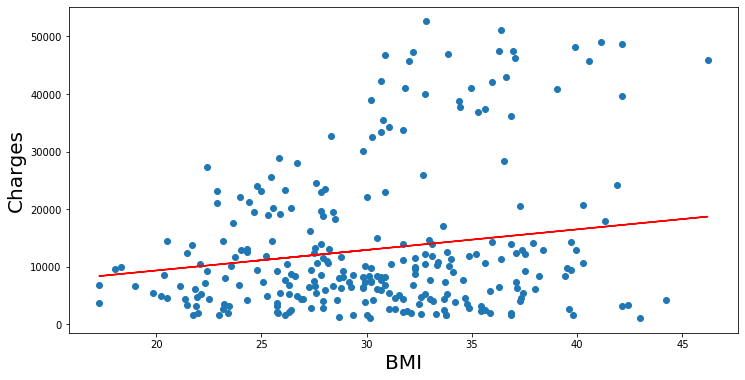

In [14]:
#Now let us do a simple Linear Regression on BMI (dependent variable) and Charges (independent variable)

#Select only 2 columns of numeric data here
X = data[['bmi']]
y = data['charges']

#Our technique will be Linear Regression again
lr = LinearRegression()

#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Train the model using the training sets
lr.fit(X_train,y_train) 
y_pred = lr.predict(X_test)

print('The Simple Linear Regression Coefficient={} and Intercept={}'.format(lr.coef_,lr.intercept_))

plt.figure(figsize=(12,6))
plt.xlabel('BMI',fontsize=20)
plt.ylabel('Charges',fontsize=20)
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, 'r')
plt.show()

**However, it seems obvious we can create a Simple Linear Regression based on Smoker Status and Charges**

In [15]:
smokers = data[data['smoker']==1]
nonsmokers = data[data['smoker']==0]

The Simple Linear Regression Coefficient=[1433.33395366] and Intercept=-12100.484677479668


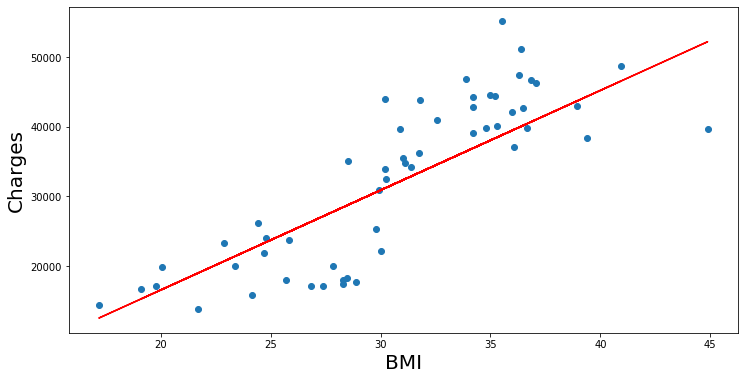

In [16]:
#Select only 2 columns of numeric data here
X = smokers[['bmi']]
y = smokers['charges']
lr = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
lr.fit(X_train,y_train) 
y_pred = lr.predict(X_test)

print('The Simple Linear Regression Coefficient={} and Intercept={}'.format(lr.coef_,lr.intercept_))
plt.figure(figsize=(12,6))
plt.xlabel('BMI',fontsize=20)
plt.ylabel('Charges',fontsize=20)
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, 'r')
plt.show()

The Simple Linear Regression Coefficient=[96.09016431] and Intercept=5325.3957473351675


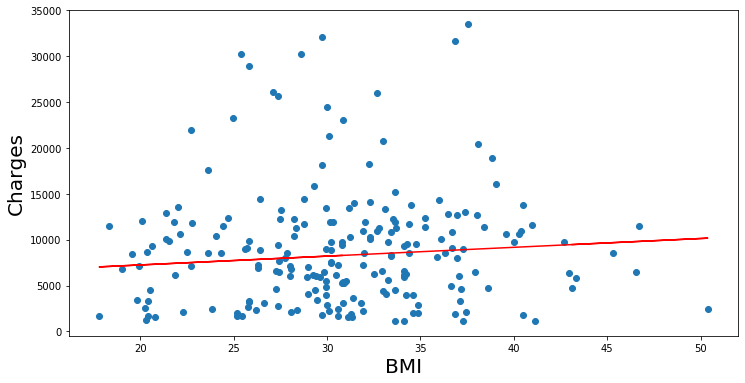

In [17]:
#Select only 2 columns of numeric data here
X = nonsmokers[['bmi']]
y = nonsmokers['charges']
lr = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
lr.fit(X_train,y_train) 
y_pred = lr.predict(X_test)

print('The Simple Linear Regression Coefficient={} and Intercept={}'.format(lr.coef_,lr.intercept_))
plt.figure(figsize=(12,6))
plt.xlabel('BMI',fontsize=20)
plt.ylabel('Charges',fontsize=20)
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, 'r')
plt.show()

# **Gradient Boosting**

In [18]:
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor

In [19]:
X = data.iloc[:, :-1].values #dependent variables in our data to regression upon
y = data.iloc[:, -1].values #charges will be our independent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0
                               ).fit(X_train, y_train)

In [21]:
mse_gb = mean_squared_error(y_test, est.predict(X_test))
mae_gb = metrics.mean_absolute_error(y_test, est.predict(X_test))
rmse_gb = np.sqrt(metrics.mean_squared_error(y_test, est.predict(X_test)))

gb_results = [mse_gb,mae_gb,rmse_gb]
gb_results

[124932633.714641, 10029.583757853197, 11177.32676961003]

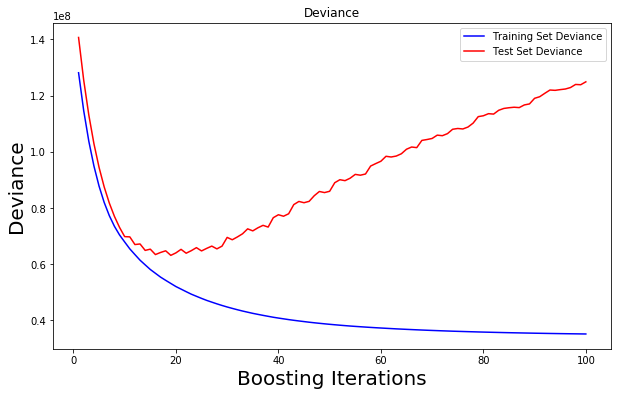

In [22]:
test_score = np.zeros((100,), dtype=np.float64)
for i, y_pred in enumerate(est.staged_predict(X_test)):
    test_score[i] = est.loss_(y_test, y_pred)
 
plt.figure(figsize=(10, 6))
plt.title('Deviance')
plt.plot(np.arange(100) + 1, est.train_score_, 'b-',label='Training Set Deviance')
plt.plot(np.arange(100) + 1, test_score, 'r-',label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations',fontsize=20)
plt.ylabel('Deviance',fontsize=20)
plt.show()

# **Decision Tree Regression**

In [23]:
from sklearn.tree import DecisionTreeRegressor

In [24]:
X = data[['bmi']] 
y = data['charges'] 

#Create an object (model)
dtr1 = DecisionTreeRegressor(max_depth=2,random_state=1)

#Fit (train) the model
dtr1.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=1)

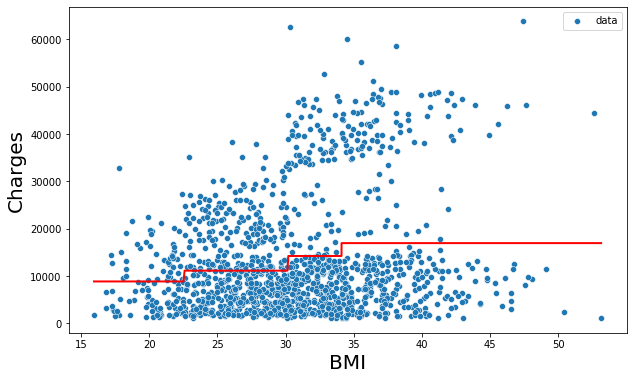

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data['bmi'], data['charges'], label='data')
plt.plot(data['bmi'].sort_values(), dtr1.predict(data['bmi'].sort_values().to_frame()),
         color='red', label='model',linewidth=2)
plt.xlabel('BMI',fontsize=20)
plt.ylabel('Charges',fontsize=20)
plt.show()

Text(0.5, 1.0, 'Hyperparameter Tuning')

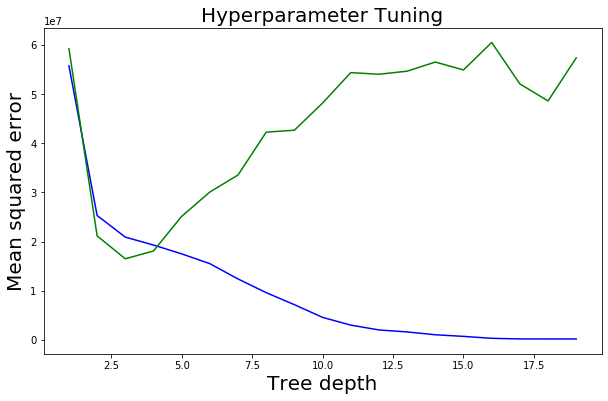

In [26]:
X = data.iloc[:, :-1].values 
y = data.iloc[:, -1].values 

'''Notice here we are again selecting ALL dependent variables from our dataset and not just BMI, the BMI 
to model plot above is used for visualization purposes'''

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10,
                                                    random_state=0,shuffle=True)

max_depths = range(1, 20)
training_error = []
for max_depth in max_depths:
    model_1 = DecisionTreeRegressor(max_depth=max_depth)
    model_1.fit(X, y)
    training_error.append(mean_squared_error(y, model_1.predict(X)))
    
testing_error = []
for max_depth in max_depths:
    model_2 = DecisionTreeRegressor(max_depth=max_depth)
    model_2.fit(X_train, y_train)
    testing_error.append(mean_squared_error(y_test, model_2.predict(X_test)))

plt.figure(figsize=(10, 6))
plt.plot(max_depths, training_error, color='blue', label='Training error')
plt.plot(max_depths, testing_error, color='green', label='Testing error')
plt.xlabel('Tree depth',fontsize=20)
plt.ylabel('Mean squared error',fontsize=20)
plt.title('Hyperparameter Tuning',size=20)

In [27]:
mse_dt = mean_squared_error(y_test, model_2.predict(X_test))
mae_dt = metrics.mean_absolute_error(y_test, model_2.predict(X_test))
rmse_dt = np.sqrt(metrics.mean_squared_error(y_test, model_2.predict(X_test)))

dt_results = [mse_gb,mae_gb,rmse_gb]
dt_results

[124932633.714641, 10029.583757853197, 11177.32676961003]

# Support Vector Regression

In [28]:
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

In [29]:
X = data.iloc[:, :-1].values.astype(float) 
y = data['charges'].values.astype(float) 

#Feature Scaling is important in SVM
sc = StandardScaler()
X1 = scale(X)
y1 = scale(y)

#Train test split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2)

#Apply the Linear SVR Model
lsvr = LinearSVR(verbose=0, dual=True)
lsvr.fit(X_train, y_train)
y_pred = scale(lsvr.predict(X_test))

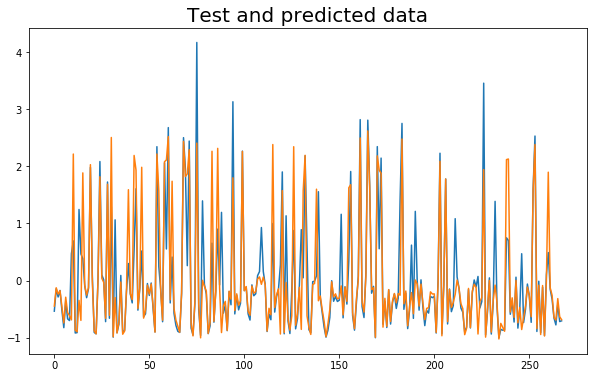

In [30]:
x_ax = range(len(y_test))
plt.figure(figsize=(10, 6))
plt.plot(x_ax, y_test, label="Y-Test")
plt.plot(x_ax, y_pred, label="Predicted Y Values")
plt.title("Test and predicted data",fontsize=20)
plt.show()

In [32]:
mse_lsvc = mean_squared_error(y_test, y_pred)
mae_lsvc = metrics.mean_absolute_error(y_test, y_pred)
rmse_lsvc = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

lsvc_results = [mse_lsvc, mae_lsvc, rmse_lsvc]
lsvc_results

[0.34085497657061214, 0.28255754019289914, 0.5838278655311102]

``Step 3: Analyze model performance metrics (RMSE, MAE and R2) and select the best model
Explain why you selected the model you did``

In [33]:
from prettytable import PrettyTable 

table_cols = ['Statistic','Linear Regression','Gradient Boosting','Decision Trees', 'Linear SVC']
results =['Mean Squared Error', 'Mean Absolute Error', 'Root Mean Square Error']

myTable = PrettyTable()
myTable.add_column(table_cols[0], results)
myTable.add_column(table_cols[1], lr_results)
myTable.add_column(table_cols[2], gb_results)
myTable.add_column(table_cols[3], dt_results)
myTable.add_column(table_cols[4], lsvc_results)
print(myTable)

+------------------------+--------------------+--------------------+--------------------+---------------------+
|       Statistic        | Linear Regression  | Gradient Boosting  |   Decision Trees   |      Linear SVC     |
+------------------------+--------------------+--------------------+--------------------+---------------------+
|   Mean Squared Error   | 31845929.13415943  |  124932633.714641  |  124932633.714641  | 0.34085497657061214 |
|  Mean Absolute Error   | 3930.3332739011444 | 10029.583757853197 | 10029.583757853197 | 0.28255754019289914 |
| Root Mean Square Error | 5643.219748880902  | 11177.32676961003  | 11177.32676961003  |  0.5838278655311102 |
+------------------------+--------------------+--------------------+--------------------+---------------------+


``For this dataset, in predicting charges, I would select a multiple Linear Regression model. On all measures we see that the Errors in prediction are less than gradient boosting and in the Decision Tree Model. It is worth noting that the Linear SVC model is scaled input and output. But because of the complexity of the SVM in general. I would stick to Linear Regression.``

# Part B: Yes/No Prediction

``Step 1: Locate, input and clean suitable data
Find a second data set that is suitable for a yes/no (logistic) prediction, impute the data and perform any clean up.``



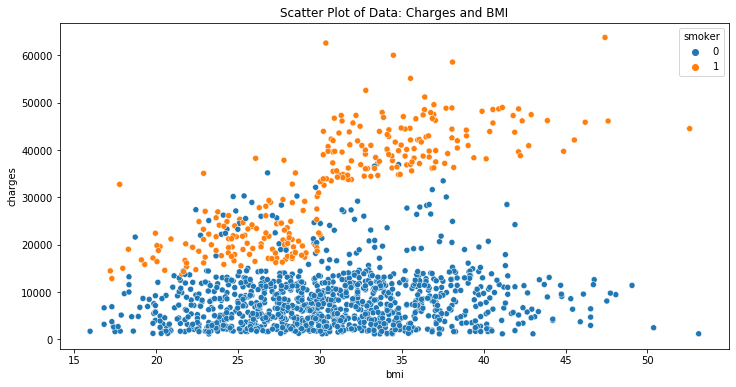

In [34]:
plt.figure(figsize=(12,6))
ax = sns.scatterplot(x='bmi',y='charges',data=data, hue='smoker')
ax.set_title('Scatter Plot of Data: Charges and BMI')
plt.show()

```As visualized in the above. The distribution of the plot of Smoker ststus is a binary class in the data. And this, we will use this for the following classifiers.```

```Step 2: Construct at least 3 different logistic models using Python
-Binary Logistic Regression
-Multinomial Logistic Regression
-Ordinal Logistic Regression```

In [35]:
data1 = data.copy()
data1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# Logistic Regression 

In [36]:
from sklearn.linear_model import LogisticRegression

X = data1.drop(columns='smoker') #dependent variables in our data to regression upon
y = data1.iloc[:,4].values #class variable smoker status

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
y_pred = logisticRegr.predict(X_test)

score = logisticRegr.score(X_test, y_test)
cm = metrics.confusion_matrix(y_test, y_pred)

Accuracy of the Model = 0.9328358208955224

Confusion Matrix
[[207   6]
 [ 12  43]]


<Figure size 576x432 with 0 Axes>

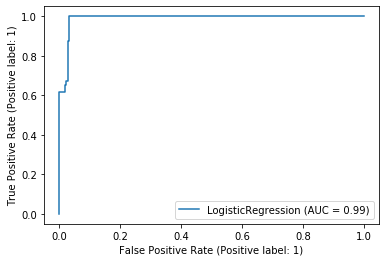

In [37]:
print('Accuracy of the Model = {}'.format(score))
print('\nConfusion Matrix\n{}'.format(cm))
plt.figure(figsize=(8,6))
metrics.plot_roc_curve(logisticRegr, X_test, y_test) 
plt.show()

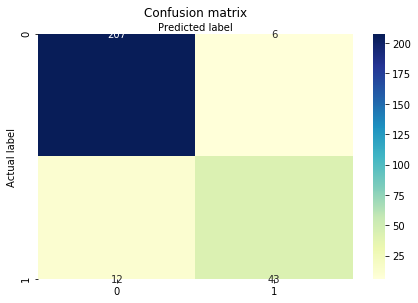

In [38]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Multinomial Logistic Regression

``Multinomial logit models represent an appropriate option when the dependent variable is categorical but not ordinal``

In [40]:
#This will be our class data for Multinomial Logistic Regression
data1.region.unique()

array([3, 2, 1, 0])

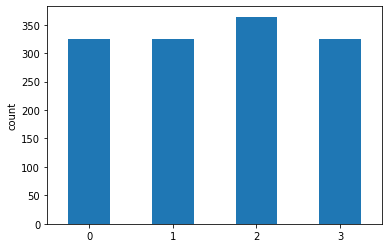

In [41]:
data1['region'].value_counts().sort_index().plot(kind='bar', rot=0, ylabel='count')
plt.show()

```Note: This probably would not work very well for a few reasons, the logic would be sound, but the result maybe not be good. First, this will take in classes that are rougly equal in size and that is generally good but the dataset gives up thousands of patients from 4 regions of the country purely at random. The main point of this dataset is to demonstrate effect on charges, so this feature is purely a technicality. Additionally, in general, the multinomial Logistic Regression does not give good results compared with binary classification``` 

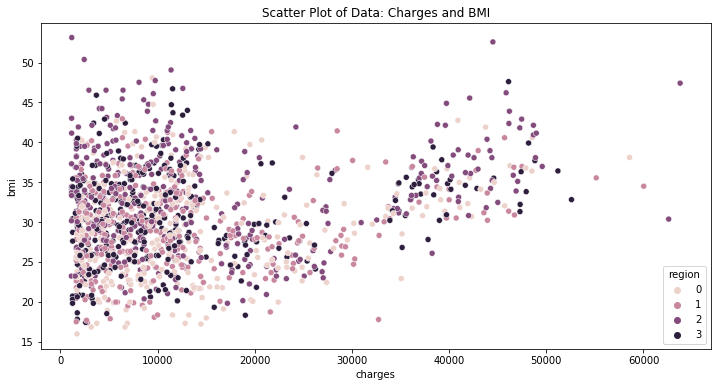

In [42]:
plt.figure(figsize=(12,6))
ax = sns.scatterplot(x='charges',y='bmi', data=data, hue='region')
ax.set_title('Scatter Plot of Data: Charges and BMI')
plt.show()

In [43]:
X = data1.drop(columns='region') #dependent variables in our data to regression upon
y = data1.iloc[:,5].values #class variable smoker status

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

multi_lr = LogisticRegression(random_state=0, multi_class='multinomial', penalty='none', 
                            solver='newton-cg').fit(X_train, y_train)
multi_lr.fit(X_train, y_train)
y_pred = multi_lr.predict(X_test)

score = logisticRegr.score(X_test, y_test)
cm = metrics.confusion_matrix(y_test, y_pred)

Accuracy of the Model = 0.26492537313432835

Confusion Matrix
[[10 23 25 17]
 [10 10 21 30]
 [ 6 10 37 17]
 [ 8 10 24 10]]


<Figure size 576x432 with 0 Axes>

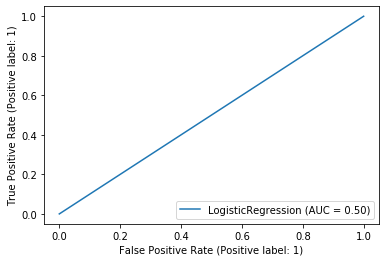

In [44]:
print('Accuracy of the Model = {}'.format(score))
print('\nConfusion Matrix\n{}'.format(cm))
plt.figure(figsize=(8,6))
metrics.plot_roc_curve(logisticRegr, X_test, y_test) 
plt.show()

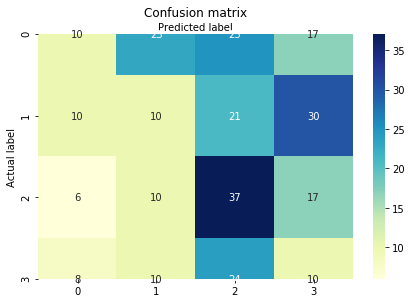

In [45]:
class_names=[0,1,2,3] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

```This worked worse than pure chance. So then how about we create a class for the numeric that the datset was intended to predict: charges. We can bucket them into a class by $10,000. This may allow the Multinomial classiier to predict better```

# Ordinal Logistic Regression

In [46]:
import scipy.stats as stats
import statsmodels as sm

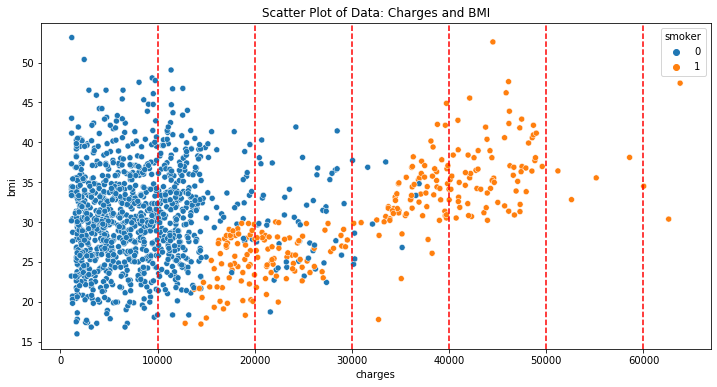

In [47]:
plt.figure(figsize=(12,6))
ax = sns.scatterplot(x='charges',y='bmi', data=data, hue='smoker')
plt.axvline(x=10000, color='r', linestyle='dashed')
plt.axvline(x=20000, color='r', linestyle='dashed')
plt.axvline(x=30000, color='r', linestyle='dashed')
plt.axvline(x=40000, color='r', linestyle='dashed')
plt.axvline(x=50000, color='r', linestyle='dashed')
plt.axvline(x=60000, color='r', linestyle='dashed')
ax.set_title('Scatter Plot of Data: Charges and BMI')
plt.show()

In [48]:
#Lets create the class for Each datapoint by Binning and append to the dataframe

bins = [0, 10000, 20000, 30000, 40000,50000,60000,70000]
labels =[1,2,3,4,5,6,7]
data1['bin'] = pd.cut(data1['charges'], bins, labels=labels)
data1.astype({'bin': 'int32'})
data1.head()

,age,sex,bmi,children,smoker,region,charges,bin
0,19,0,27.900,0,1,3,16884.92400,2
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,1
3,33,1,22.705,0,0,1,21984.47061,3
4,32,1,28.880,0,0,1,3866.85520,1


In [49]:
X = data1.drop(columns=['charges','bin']) #dependent variables in our data to regression upon
y = data1.iloc[:,7].values #class variable our bins

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

multi_lr = LogisticRegression(random_state=0, multi_class='multinomial', penalty='none', 
                            solver='newton-cg').fit(X_train, y_train)
multi_lr.fit(X_train, y_train)
y_pred = multi_lr.predict(X_test)

score = multi_lr.score(X_test, y_test)
cm = metrics.confusion_matrix(y_test, y_pred)

Accuracy of the Model = 0.8507462686567164

Confusion Matrix
[[140   7   0   0   0   0]
 [  8  54   0   1   0   0]
 [  3  13   6   1   0   0]
 [  0   0   1  11   2   0]
 [  0   0   0   2  17   0]
 [  0   0   0   1   1   0]]


<Figure size 576x432 with 0 Axes>

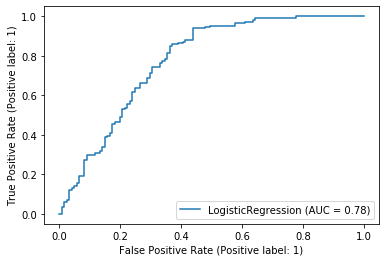

In [50]:
print('Accuracy of the Model = {}'.format(score))
print('\nConfusion Matrix\n{}'.format(cm))
plt.figure(figsize=(8,6))
metrics.plot_roc_curve(logisticRegr, X_test, y_test) 
plt.show()

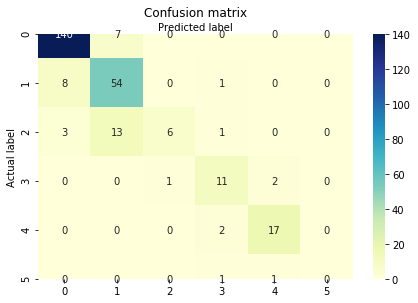

In [51]:
class_names=[1,2,3,4,5,6,7] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

``Step 3: Analyze model performance metrics (AUC, ROC, Confusion Matrix) and select the best logistic model
Explain why you selected the model you did``

```Based on all performance metrics, I would use the generic logistic regression for the binary classifier task for determining, who in the dataset is a smoker and who is not. The accuracy for the multiclass problems is very bad and the accuracy for the ordinal class is really good.```

# Part C. Clustering

```Step 1: Use your Part A or Part B dataset```

In [53]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


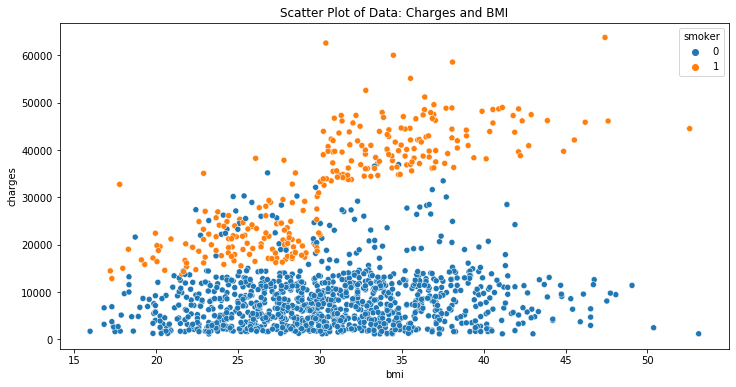

In [54]:
plt.figure(figsize=(12,6))
ax = sns.scatterplot(x='bmi',y='charges', data=data, hue='smoker')
ax.set_title('Scatter Plot of Data: Charges and BMI')
plt.show()

```Step 2: Create a cluster model
You do not need to employ multiple algorithms here. Just explain what approach you used.```

In [55]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans

In [56]:
#Select only 2 numeric columns to try to cluster the smoker classes
X = data[['bmi', 'charges']]
y = data['smoker'] 

#Install the Kmeans Algorithm
kmeans = KMeans(2)
kmeans.fit(X)

#y_pred
identified_clusters = kmeans.fit_predict(X)

data_with_clusters = data1.copy()
data_with_clusters['Clusters'] = identified_clusters 

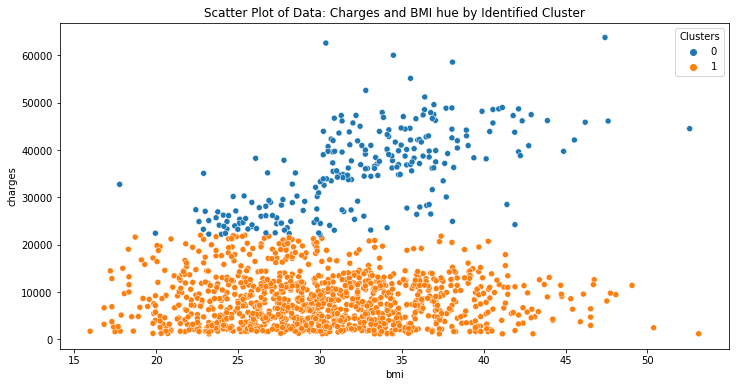

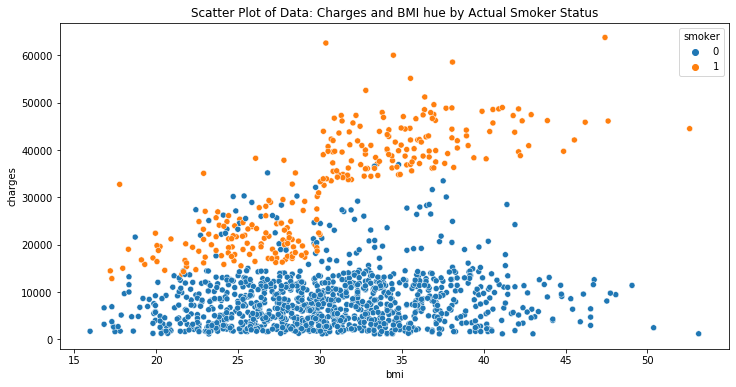

In [57]:
#Our clustered plot
plt.figure(figsize=(12,6))
ax = sns.scatterplot(x='bmi',y='charges', data=data_with_clusters, hue='Clusters')
ax.set_title('Scatter Plot of Data: Charges and BMI hue by Identified Cluster')
plt.show()

#The Original Plot
plt.figure(figsize=(12,6))
ax = sns.scatterplot(x='bmi',y='charges', data=data, hue='smoker')
ax.set_title('Scatter Plot of Data: Charges and BMI hue by Actual Smoker Status')
plt.show()

Score: -668.817


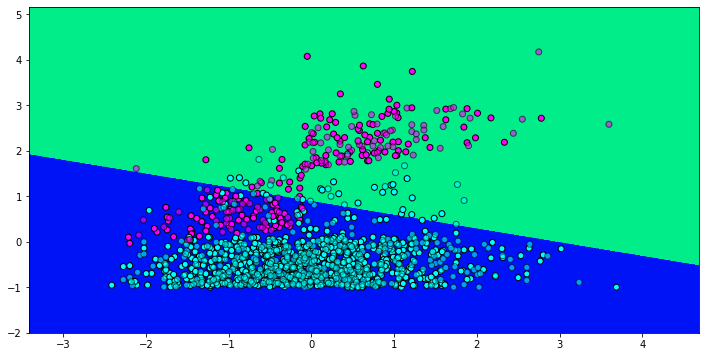

In [58]:
draw_decision_boundary(kmeans, X, y, h = .01)

In [59]:
s_clus = np.sum([data_with_clusters['Clusters']==1])
s_actual = np.sum( [data['smoker'] == 1])
ns_clus = np.sum([data_with_clusters['Clusters']==0])
ns_actual = np.sum( [data['smoker'] == 0])

print('The Actual Number of Smokers is {}'.format(s_actual))
print('The Clustered Number of Smokers is {}'.format(s_clus))
print('\nThe Actual Number of Non-Smokers is {}'.format(ns_actual))
print('The Clustered Number of Non-Smokers is {}'.format(ns_clus)) 

The Actual Number of Smokers is 274
The Clustered Number of Smokers is 1099

The Actual Number of Non-Smokers is 1064
The Clustered Number of Non-Smokers is 239


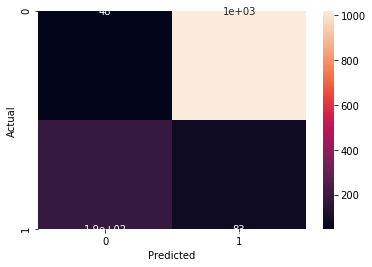

In [60]:
data3 = {'y_Actual': data1['smoker'].tolist(),
        'y_Predicted': data_with_clusters['Clusters'].tolist()}

df = pd.DataFrame(data3, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [61]:
y_actual = data1['smoker'].tolist()
y_pred = data_with_clusters['Clusters'].tolist()

print(metrics.confusion_matrix(y_actual, y_pred, ))
print(metrics.classification_report(y_actual, y_pred, ))

[[  48 1016]
 [ 191   83]]
              precision    recall  f1-score   support

           0       0.20      0.05      0.07      1064
           1       0.08      0.30      0.12       274

    accuracy                           0.10      1338
   macro avg       0.14      0.17      0.10      1338
weighted avg       0.18      0.10      0.08      1338



``Step 3: Explain the clusters
And what you can learn from them.``

```The clusiering algorithm with just 2 clsters, one for smoker and the other gives a 92% accuracy. As we have seen from previous plots, there is a some overlap between points on the bmi and charges. But very quickly, we see diversions, based on the smoker status class in our original data. However, in the kmeas clustering method from sklearn we have only data from the BMI and the charges, and use the distance method for generalizing the cluster. Since we have 2 clusters, the accuracy is quite impressive. We see that even with the KMeans clustering, we have that the in general, those patients that smoke charge more to the insurance company and the higher their BMI, the more dramatic the increase in the charges``` 